## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [56]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
display(data)
print('Размер', data.shape)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


Размер (1000, 21)


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [58]:
if data.isna().sum().sum() == 0:
    print('Пропусков нет')
else:
    print('Пропуски есть')

Пропусков нет


## Признаки:

Количественные: duration, amount, age.

Бинарные: telephone, foreign_worker, credit_risk.

Порядковые: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable.

Категориальные: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job.

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [59]:
display(data.groupby(by='purpose')['amount'].mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [60]:
first_result = (data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0])
second_result = (data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0])
print(f'a) {first_result:.2%}')
print(f'b) {second_result:.2%}')


a) 66.67%
b) 68.01%


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [61]:
print(data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].shape[0])

1


### Задание 6 (1 балл)

In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

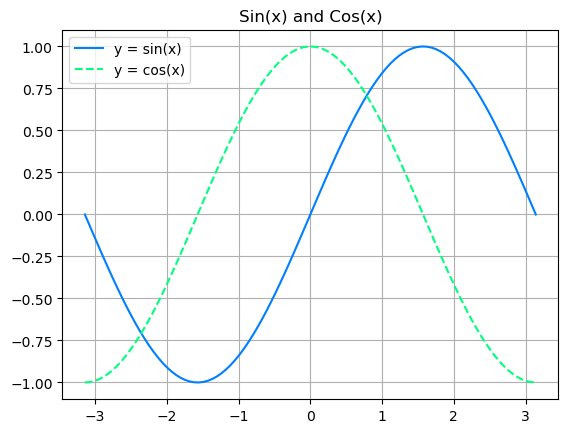

In [63]:
x = np.linspace(-np.pi, np.pi, 100)
y_1 = np.sin(x)
y_2 = np.cos(x)
plt.title('Sin(x) and Cos(x)')
plt.plot(x, y_1, color='#007FFF', label='y = sin(x)')
plt.plot(x, y_2, color='#00FF7F', linestyle='--', label='y = cos(x)')
plt.grid()
plt.legend(loc='upper left')
plt.show()


### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

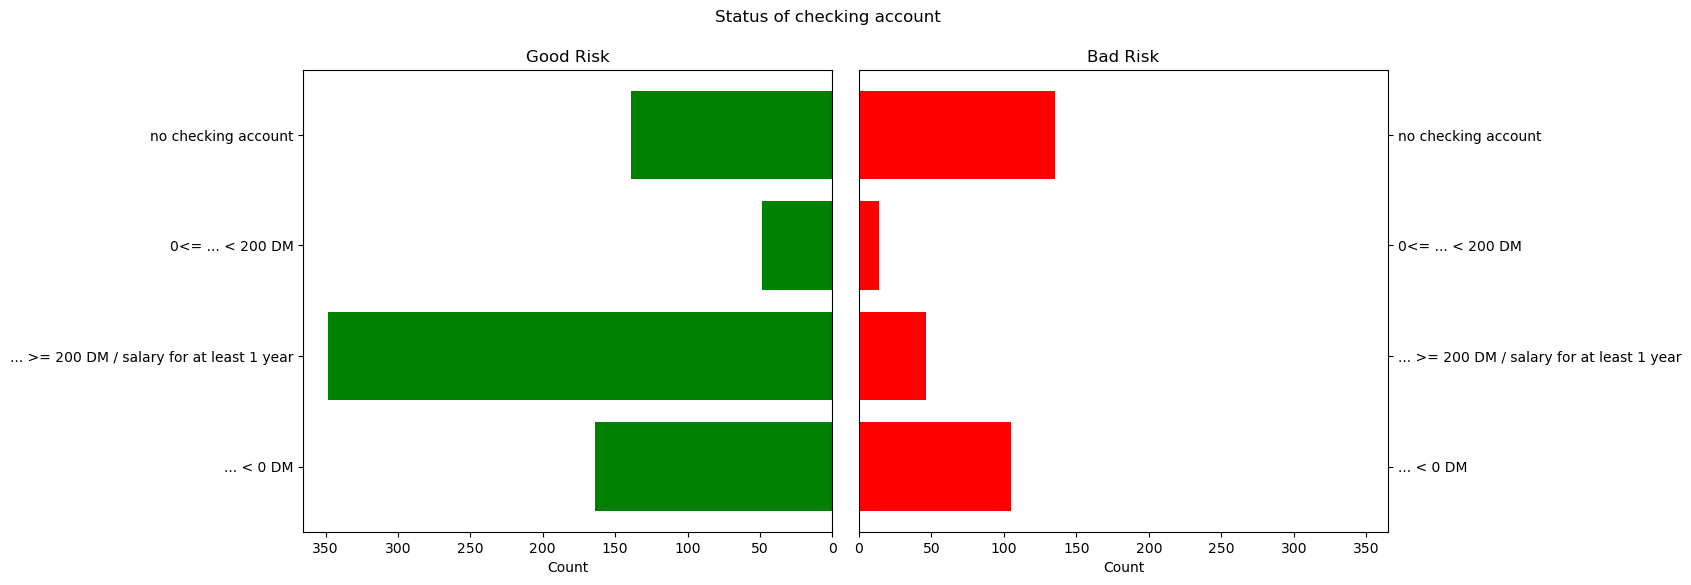

In [64]:
good_risk = data[data['credit_risk'] == 'good'].groupby(by='status')['amount'].count()
good_risk = pd.DataFrame(good_risk).reset_index()
bad_risk = data[data['credit_risk'] == 'bad'].groupby(by='status')['amount'].count()
bad_risk = pd.DataFrame(bad_risk).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Status of checking account')

ax[0].set_title('Good Risk')
ax[1].set_title('Bad Risk')

ax[0].set_xlabel('Count')
ax[1].set_xlabel('Count')

ax[0].invert_xaxis()

ax[0].barh(good_risk['status'], good_risk['amount'], color='green')
ax[1].barh(bad_risk['status'], bad_risk['amount'], color='red')

ax[1].yaxis.tick_right()
ax[1].set_xlim([0, 365])

plt.subplots_adjust(wspace=0.05)
plt.show()


## Выводы:
- С огромной долей вероятности вернут кредит те люди, у которых на счету >= 200 дойче-марок.
- Точно сказать нельзя, выплатит кредит или нет человек без счёта.
- Хорошо выплачивают кредиты те, у кого от 0 до 200 дойче-марок.
- У кого меньше 0 дойче-марок, достаточно часто возвращают кредит, но полной уверенности в выплате нет, соотшение тех, кто выплачивает и не выплачивает примерно 1.5 к 1, что не очень хорошо.

### Задание 8  (0.5 балла)

In [65]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot: xlabel='savings', ylabel='count'>

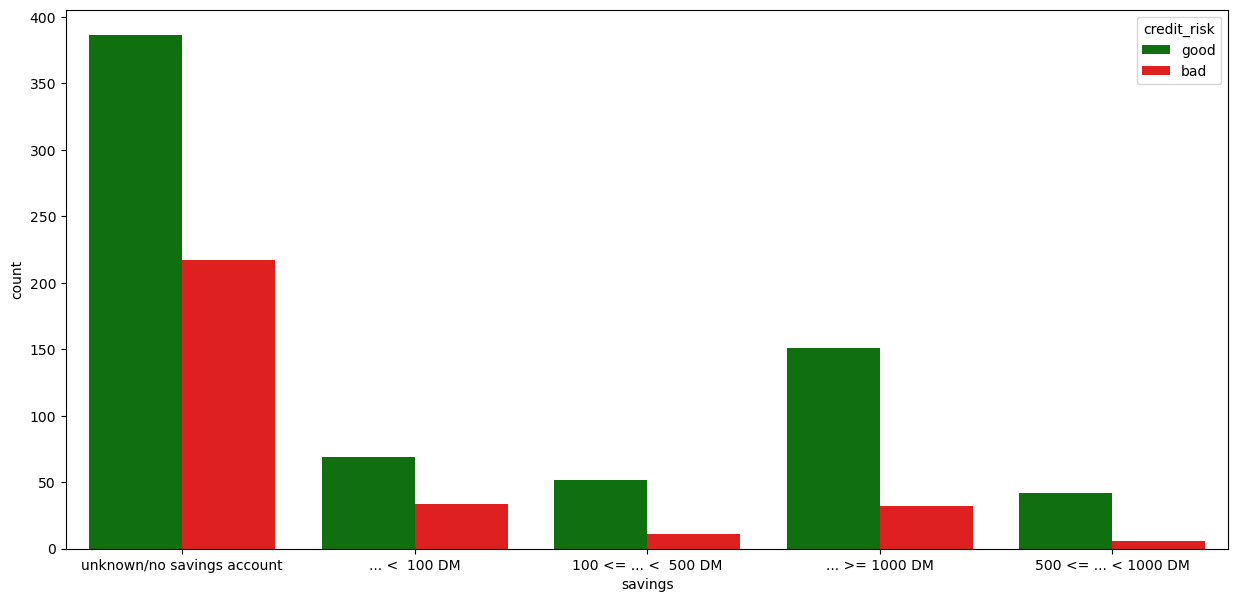

In [66]:
plt.figure(figsize=(15, 7))
sns.countplot(data, x='savings', hue='credit_risk', palette=['Green', 'Red'])
# И с точки зрения написания кода, и удобства просмотра результата, однозначно выигрывает seaborn. Вместо 15 строк кода тут получилось всего 2.
# И результаты проще анализировать с таким графиком


## Выводы:
- Мы не можем быть до конца уверены, что кредит выплатят те, у кого сбережений либо нет, либо их меньше 100 дойче-марок. (соотношение тех, кто платит и не платит, не очень хорошее)
- Те, у кого в сбережениях 100 и больше дойче-марок ,очень хорошо выплачивают кредиты, можно быть уверенным, что с большой долей вероятности такие клиенты будут выплачивать кредит.

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot: xlabel='savings', ylabel='age'>

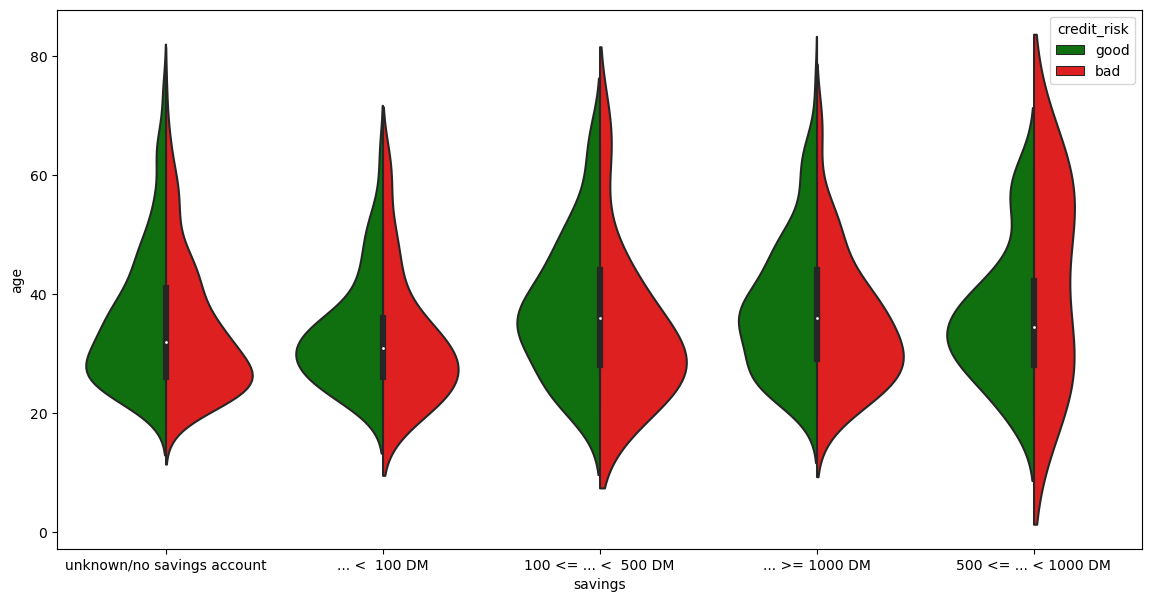

In [67]:
plt.figure(figsize=(14, 7))
sns.violinplot(data, x='savings', y='age', hue='credit_risk',
               palette=['Green', 'Red'], split=True)


## Выводы:
- Бросается в глаза то, что необычно выглядит распределение тех, кто не отдал кредит в диапазоне от 500 до 1000 дойче-марок. Оно практически равномерное.
- Кредит берут в среднем от 20 до 40 лет (наибольшее число близико примерно к 30 годам) и не возвращают кредит чаще всего в более юном возрасте. Особенно это заметно при возврате кредита >= 1000 дойче-марок. Много молодых людей не возвращали кредит, а более зрелые (40+) имеют гораздо лучшие показатели. 

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

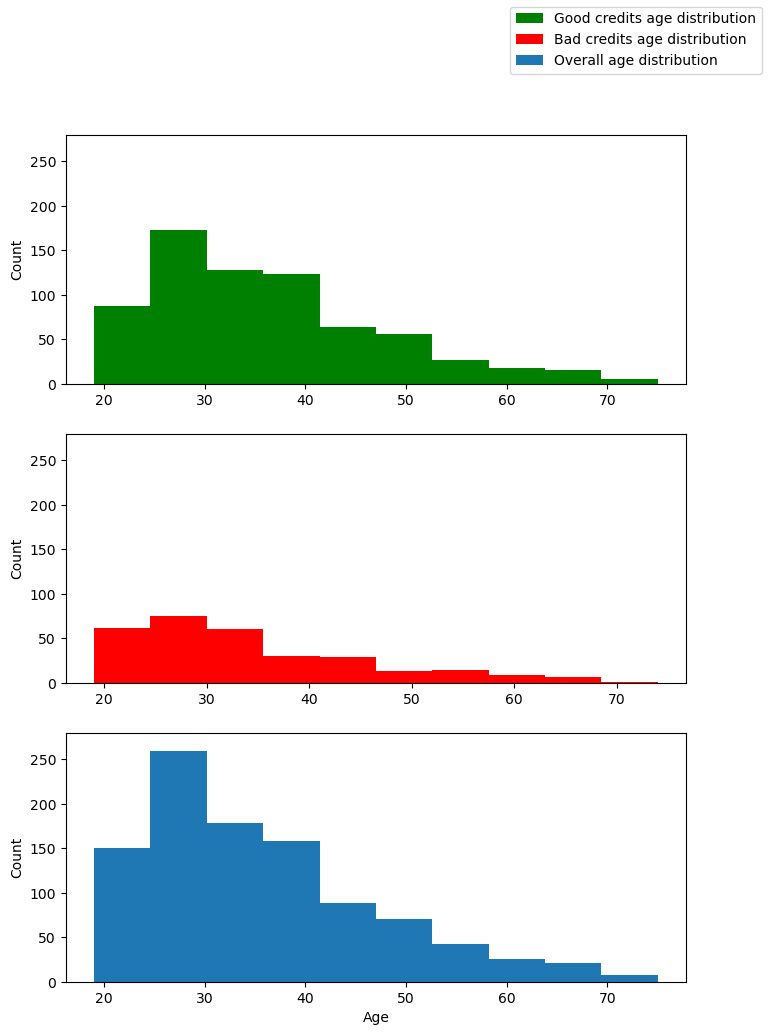

In [68]:
fig, ax = plt.subplots(3, 1, figsize=(8, 11))
plt.xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[2].set_ylabel('Count')

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)

ax[0].hist(data[data['credit_risk'] == 'good']['age'],
           color='green', label='Good credits age distribution')
ax[1].hist(data[data['credit_risk'] == 'bad']['age'],
           color='red', label='Bad credits age distribution')
ax[2].hist(data['age'], label='Overall age distribution')

ax[0].set_ylim([0, 280])
ax[1].set_ylim([0, 280])
ax[2].set_ylim([0, 280])

fig.legend()
plt.show()


## Выводы:
- Большинство кредитов берётся в возрасте от 20 до 40 лет. Наибольшее - примерно от 25 до 30.
- Количество отданных кредитов больше, чем не возвращённых.

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

<AxesSubplot: xlabel='Credit amount', ylabel='Duration'>

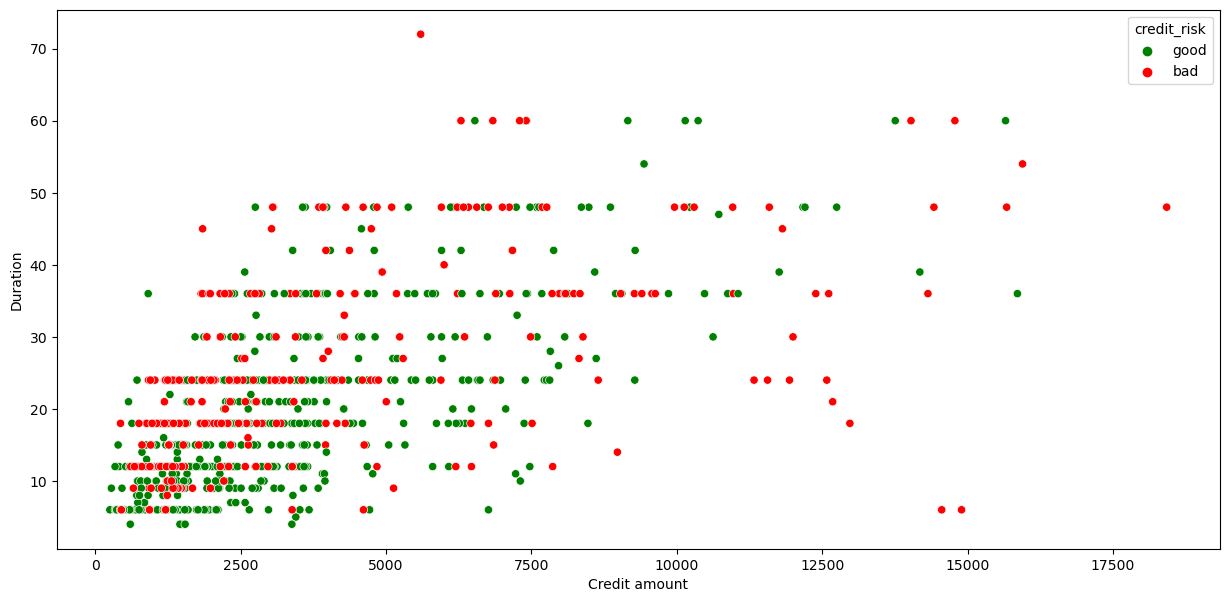

In [69]:
plt.figure(figsize=(15, 7))
plt.xlabel('Credit amount')
plt.ylabel('Duration')
sns.scatterplot(data, x='amount', y='duration',
                hue='credit_risk', palette=['Green', 'Red'])


## Выводы:
- Скалдывается впечатление, что кредиты, взятые на небольшие суммы и на небольшой промежуток времени, возвращаются чаще, чем на большие суммы с большим промежутком времени.

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

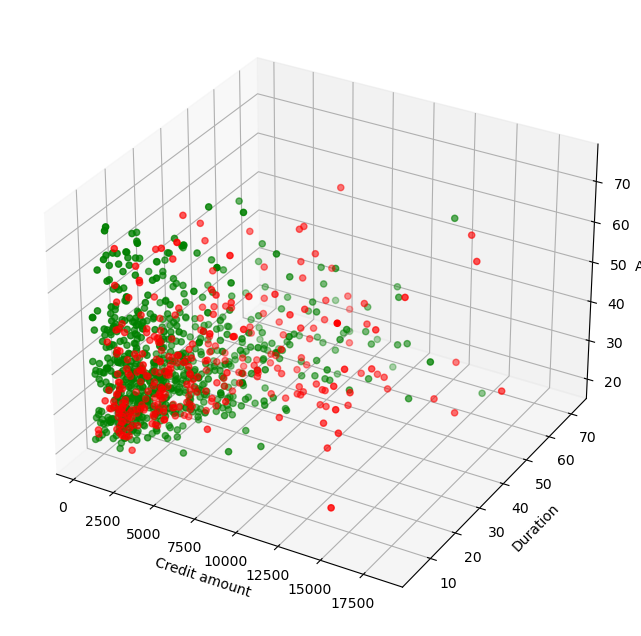

In [70]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
good_risk = data[data['credit_risk'] == 'good']
ax.scatter3D(good_risk['amount'], good_risk['duration'],
             good_risk['age'], color='green')

bad_risk = data[data['credit_risk'] == 'bad']
ax.scatter3D(bad_risk['amount'], bad_risk['duration'],
             bad_risk['age'], color='red')


## Выводы:
- Тяжело...
- Кое-как можно увидеть, что скопление взятых кредитов как раз в возрасте от 20 до 40. И в возрасте от 40 до 70 мало красных точек, что опять же говорит о том, что в более зрелом возрасте люди чаще возвращали кредит.

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [71]:
# Сначала работаем с бинарными:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['telephone'] = label.fit_transform(data['telephone'])
data['foreign_worker'] = label.fit_transform(data['foreign_worker'])
data['credit_risk'] = label.fit_transform(data['credit_risk'])

# Теперь с порядковыми:

def change_status(value: str) -> int:
    if value == 'no checking account':
        return 0
    elif value == '... < 0 DM':
        return 1
    elif value == '0<= ... < 200 DM':
        return 2
    else:
        return 3


data['status'] = data['status'].apply(change_status)


def change_savings(value: str) -> int:
    if value == 'unknown/no savings account':
        return 0
    elif value == '... <  100 DM':
        return 1
    elif value == '100 <= ... <  500 DM':
        return 2
    elif value == '500 <= ... < 1000 DM':
        return 3
    else:
        return 4


data['savings'] = data['savings'].apply(change_savings)


def change_employment_duration(value: str) -> int:
    if value == 'unemployed':
        return 0
    elif value == '< 1 yr':
        return 1
    elif value == '1 <= ... < 4 yrs':
        return 2
    elif value == '4 <= ... < 7 yrs':
        return 3
    else:
        return 4


data['employment_duration'] = data['employment_duration'].apply(change_employment_duration)


def change_installment_rate(value: str) -> int:
    if value == '< 20':
        return 0
    elif value == '20 <= ... < 25':
        return 1
    elif value == '25 <= ... < 35':
        return 2
    else:
        return 3


data['installment_rate'] = data['installment_rate'].apply(change_installment_rate)


def change_present_residence(value: str) -> int:
    if value == '< 1 yr':
        return 0
    elif value == '1 <= ... < 4 yrs':
        return 1
    elif value == '4 <= ... < 7 yrs':
        return 2
    else:
        return 3


data['present_residence'] = data['present_residence'].apply(change_present_residence)


def change_number_credits(value: str) -> int:
    if value == '1':
        return 0
    elif value == '2-3':
        return 1
    elif value == '4-5':
        return 2
    else:
        return 3


data['number_credits'] = data['number_credits'].apply(change_number_credits)


def change_people_liable(value: str) -> int:
    if value == '0 to 2':
        return 0
    else:
        return 1


data['people_liable'] = data['people_liable'].apply(change_people_liable)

# Избавимся от категориальных:

data.drop(columns=['credit_history', 'purpose', 'personal_status_sex',
                      'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], inplace=True)

display(data)


,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,841,1,3,2,3,23,0,0,0,0,1
3,0,12,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,2171,0,2,0,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1987,0,2,2,3,21,0,1,0,0,0
996,0,24,2303,0,4,0,0,45,0,0,0,0,0
997,3,21,12680,4,4,0,3,30,0,0,1,0,0
998,1,12,6468,4,0,2,0,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [72]:
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

class KNN():
    def __init__(self, K=5):
        self.mmc = MinMaxScaler()
        self.K = K
    
    def fit(self, X_train: np.array, y_train: np.array) -> None:
        self.X_train = X_train
        self.X_train = self.mmc.fit_transform(self.X_train)
        self.y_train = y_train

    def distance(self, x_test: np.array, x_train: np.array) -> float:
        return np.sqrt(np.sum(np.square(x_test - x_train)))
    
    def find_k_neighbors(self, x_test: np.array) -> np.array:
        distances = np.zeros(len(self.X_train))

        for i in range(len(self.X_train)):
            distances[i] = self.distance(x_test, self.X_train[i])
            
        y_train_sorted = self.y_train[distances.argsort()]
        return y_train_sorted[:self.K]
    
    def predict(self, X_test: np.array) -> np.array:
        self.X_test = X_test
        self.X_test= self.mmc.transform(X_test)
        y_pred = np.zeros(len(self.X_test), dtype=np.int64)
        for i in range(len(self.X_test)):
            x_cur = self.X_test[i]
            neighbors = self.find_k_neighbors(x_cur)
            y_pred[i] = Counter(neighbors).most_common(1)[0][0]
        return y_pred



In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(columns=['credit_risk']).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy = []
for k in range(40):
    test_model = KNN(k + 1)
    test_model.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test,test_model.predict(X_test)))

k_with_max_accuracy = np.argmax(accuracy) + 1
print('Best K:', k_with_max_accuracy)
model = KNN(k_with_max_accuracy)
model.fit(X_train, y_train)
print('Accuracy score:', accuracy_score(y_test, model.predict(X_test)))


Best K: 17
Accuracy score: 0.76
